In [1]:
# importing libraries
import pandas as pd
import numpy as np



# read the data in a pandas dataframe
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/weather_sample.csv")

# drop or delete the unnecessary columns in the data.
data = data.drop(['Events', 'Date', 'SeaLevelPressureHighInches',
				'SeaLevelPressureLowInches'], axis = 1)

# some values have 'T' which denotes trace rainfall
# we need to replace all occurrences of T with 0
# so that we can use the data in our model
data = data.replace('T', 0.0)

# the data also contains '-' which indicates no
# or NIL. This means that data is not available
# we need to replace these values as well.
data = data.replace('-', 0.0)

# save the data in a csv file
data.to_csv('/content/drive/MyDrive/Colab Notebooks/weather_final.csv')


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


The precipitation in inches for the input is: [[1.33868402]]
the precipitation trend graph: 


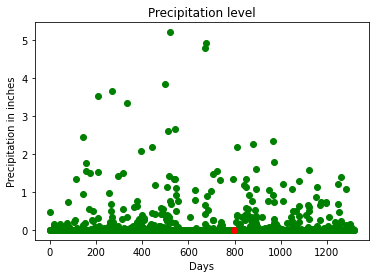

Precipitation vs selected attributes graph: 


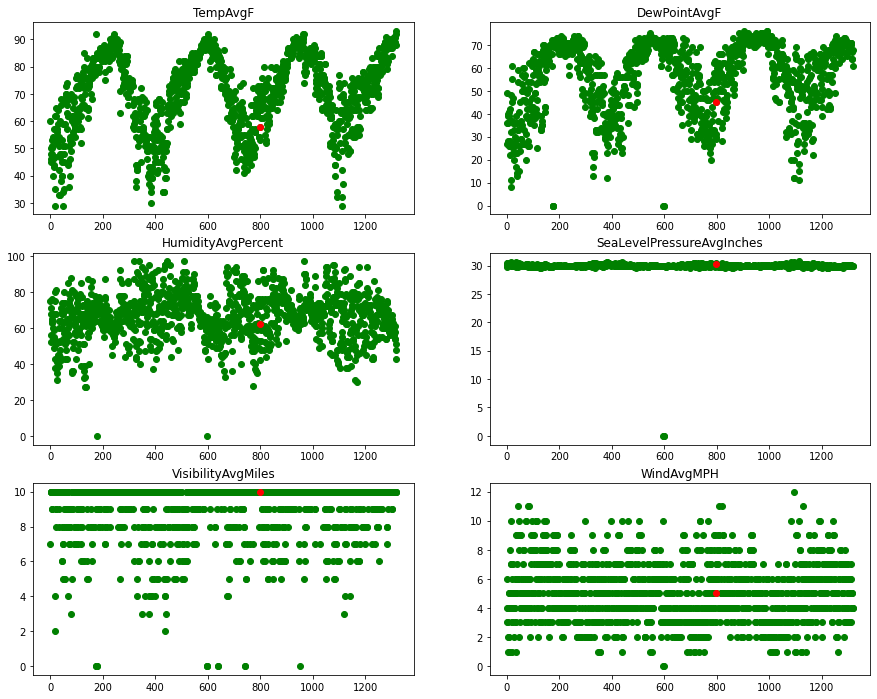

In [31]:
# importing libraries
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# read the cleaned data
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/weather_final.csv")

# the features or the 'x' values of the data
# these columns are used to train the model
# the last column, i.e, precipitation column
# will serve as the label
X = data.drop(['PrecipitationSumInches'], axis = 1)

# the output or the label.
Y = data['PrecipitationSumInches']
# reshaping it into a 2-D vector
Y = Y.values.reshape(-1, 1)

# consider a random day in the dataset
# we shall plot a graph and observe this
# day
day_index = 798
days = [i for i in range(Y.size)]

# initialize a linear regression classifier
clf = LinearRegression()
# train the classifier with our
# input data.
clf.fit(X, Y)

# give a sample input to test our model
# this is a 2-D vector that contains values
# for each column in the dataset.
inp = np.array([[74], [60], [45], [67], [49], [43], [33], [45],
				[57], [29.68], [10], [7], [2], [0], [20], [4], [31]])
inp = inp.reshape(1, -1)

# print the output.
print('The precipitation in inches for the input is:', clf.predict(inp))

# plot a graph of the precipitation levels
# versus the total number of days.
# one day, which is in red, is
# tracked here. It has a precipitation
# of approx. 2 inches.
print("the precipitation trend graph: ")
plt.scatter(days, Y, color = 'g')
plt.scatter(days[day_index], Y[day_index], color ='r')

plt.title("Precipitation level")
plt.xlabel("Days")
plt.ylabel("Precipitation in inches")

plt.show()

x_vis = X.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent',
				'SeaLevelPressureAvgInches', 'VisibilityAvgMiles',
				'WindAvgMPH'], axis = 1)

# plot a graph with a few features (x values)
# against the precipitation or rainfall to observe
# the trends

print("Precipitation vs selected attributes graph: ")
plt.figure(figsize=(15, 12))
for i in range(x_vis.columns.size):
	plt.subplot(3, 2, i + 1)
	plt.scatter(days, 
	            x_vis[x_vis.columns.values[i][:100]],
											color = 'g')
	plt.scatter(days[day_index],
				x_vis[x_vis.columns.values[i]][day_index],
				color ='r')
	plt.title(x_vis.columns.values[i])
#print("Precipitation vs ", x_vis.columns.values[i] ," graph: ")
plt.show()


Precipitation vs selected attributes graph: 


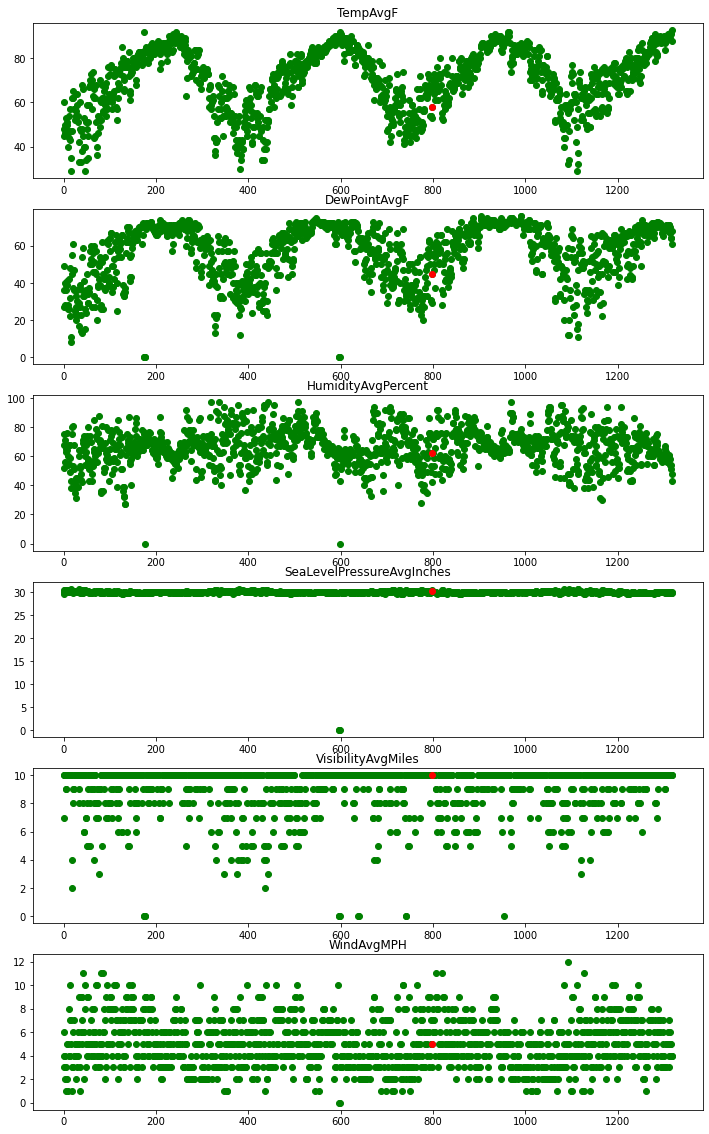

In [22]:
x_vis = X.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent',
				'SeaLevelPressureAvgInches', 'VisibilityAvgMiles',
				'WindAvgMPH'], axis = 1)

# plot a graph with a few features (x values)
# against the precipitation or rainfall to observe
# the trends

print("Precipitation vs selected attributes graph: ")
plt.figure(figsize=(12, 20))
for i in range(x_vis.columns.size):
	#print("Precipitation vs ", x_vis.columns.values[i] ," graph: ")
	plt.subplot(6, 1, i + 1)
	plt.scatter(days, x_vis[x_vis.columns.values[i][:100]],
											color = 'g')

	plt.scatter(days[day_index],
				x_vis[x_vis.columns.values[i]][day_index],
				color ='r')

	plt.title(x_vis.columns.values[i])

plt.show()
